Reading and plotting DOSCAR

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
import pandas as pd

def read_dataset(file_path, delimiter='\t'):
    try:
        # Read the dataset
        df = pd.read_csv(file_path, delimiter=delimiter)
        # Return the DataFrame
        return df
    except FileNotFoundError:
        print("File not found. Please provide a valid file path.")
        return None
    except Exception as e:
        print("An error occurred:", str(e))
        return None

# Example usage:
file_path = "./DOSCAR_NHNNO"  # Replace this with your dataset file path
dataset = read_dataset(file_path)
if dataset is not None:
    print("Dataset loaded successfully!")
    #print(dataset.head())


df_columns = dataset['DOSCAR'].str.split(expand=True)
df_columns = df_columns.astype(float)
print(df_columns.iloc[3001:4003,1:].sum(axis=1))


Dataset loaded successfully!
3001    3001.531850
3002       0.000000
3003       0.000000
3004       0.000000
3005       0.000000
           ...     
3998       0.159402
3999       0.165091
4000       0.170843
4001       0.174081
4002       0.175433
Length: 1002, dtype: float64


3002 6003
6004 9005
9006 12007
12008 15009
15010 18011
18012 21013
21014 24015
24016 27017
27018 30019
30020 33021
33022 36023
36024 39025
39026 42027
42028 45029
45030 48031


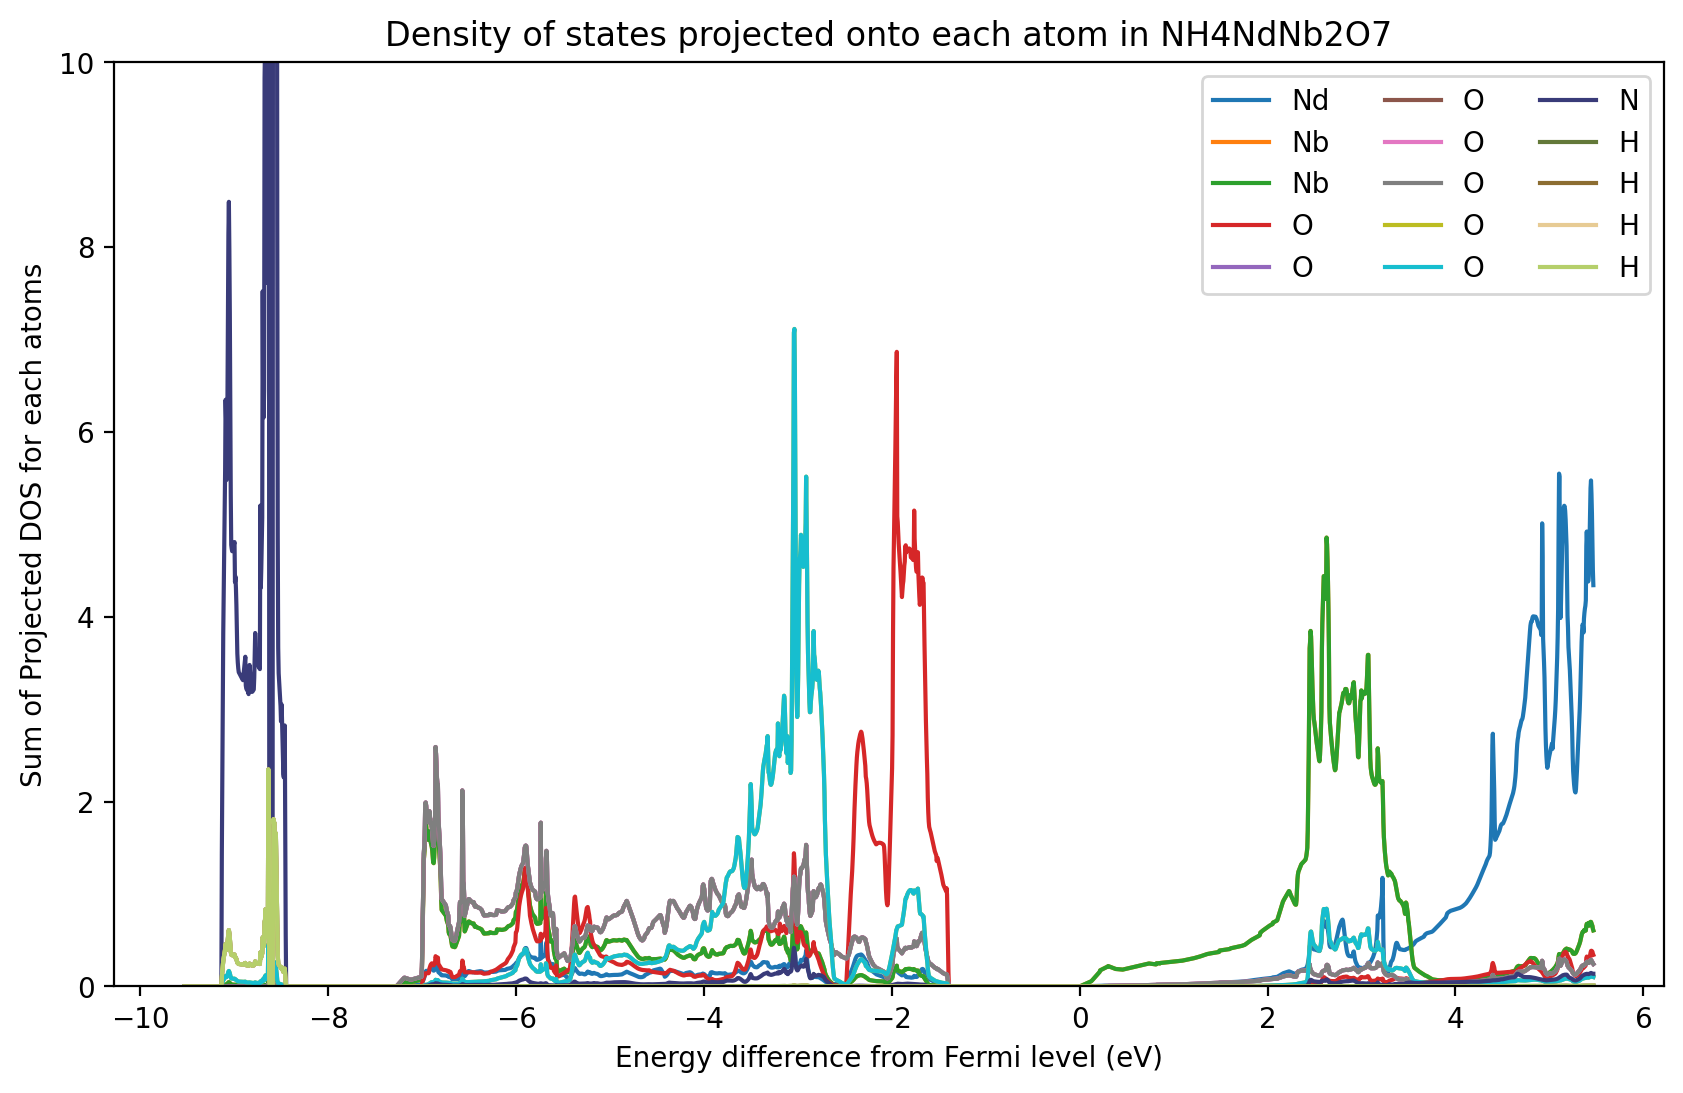

In [4]:
plt.figure(figsize=(10, 6), dpi=200)  # Adjust figure size as needed
start_idx = 3002
label_list = ['Nd', 'Nb', 'Nb', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'N', 'H', 'H', 'H', 'H']

color_palette = [
    '#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf',
    '#393b79', '#637939', '#8c6d31', '#e7cb94',  '#b5cf6b',
    '#8ca252', '#cedb9c', '#bd9e39', '#e7ba52',  '#ad494a', '#d6616b', '#e7969c', '#7b4173', '#a55194',
    '#ce6dbd', '#de9ed6', '#393b79', '#5254a3', '#6b6ecf', '#9c9ede', '#637939', '#8ca252', '#b5cf6b', '#cedb9c'
]

for i in range(15):
    # Calculate the range for each section
    end_idx = start_idx + 3001
    print(start_idx, end_idx)
    
    # Extract first column and sum of subsequent columns for each section
    first_column = df_columns.iloc[start_idx:end_idx, 0] - 4.53185039
    sum_subsequent_columns = df_columns.iloc[start_idx:end_idx, 1:].sum(axis=1)
    start_idx = end_idx + 1
    
    # Plot each section with the specified color and label
    plt.plot(first_column, sum_subsequent_columns, label=label_list[i], color=color_palette[i % len(color_palette)])

plt.ylim(0, 10)
plt.xlabel("Energy difference from Fermi level (eV)")
plt.ylabel("Sum of Projected DOS for each atoms")
plt.title("Density of states projected onto each atom in NH4NdNb2O7")
plt.legend(loc='upper right', bbox_to_anchor=(1, 1), ncol=3)
plt.show()

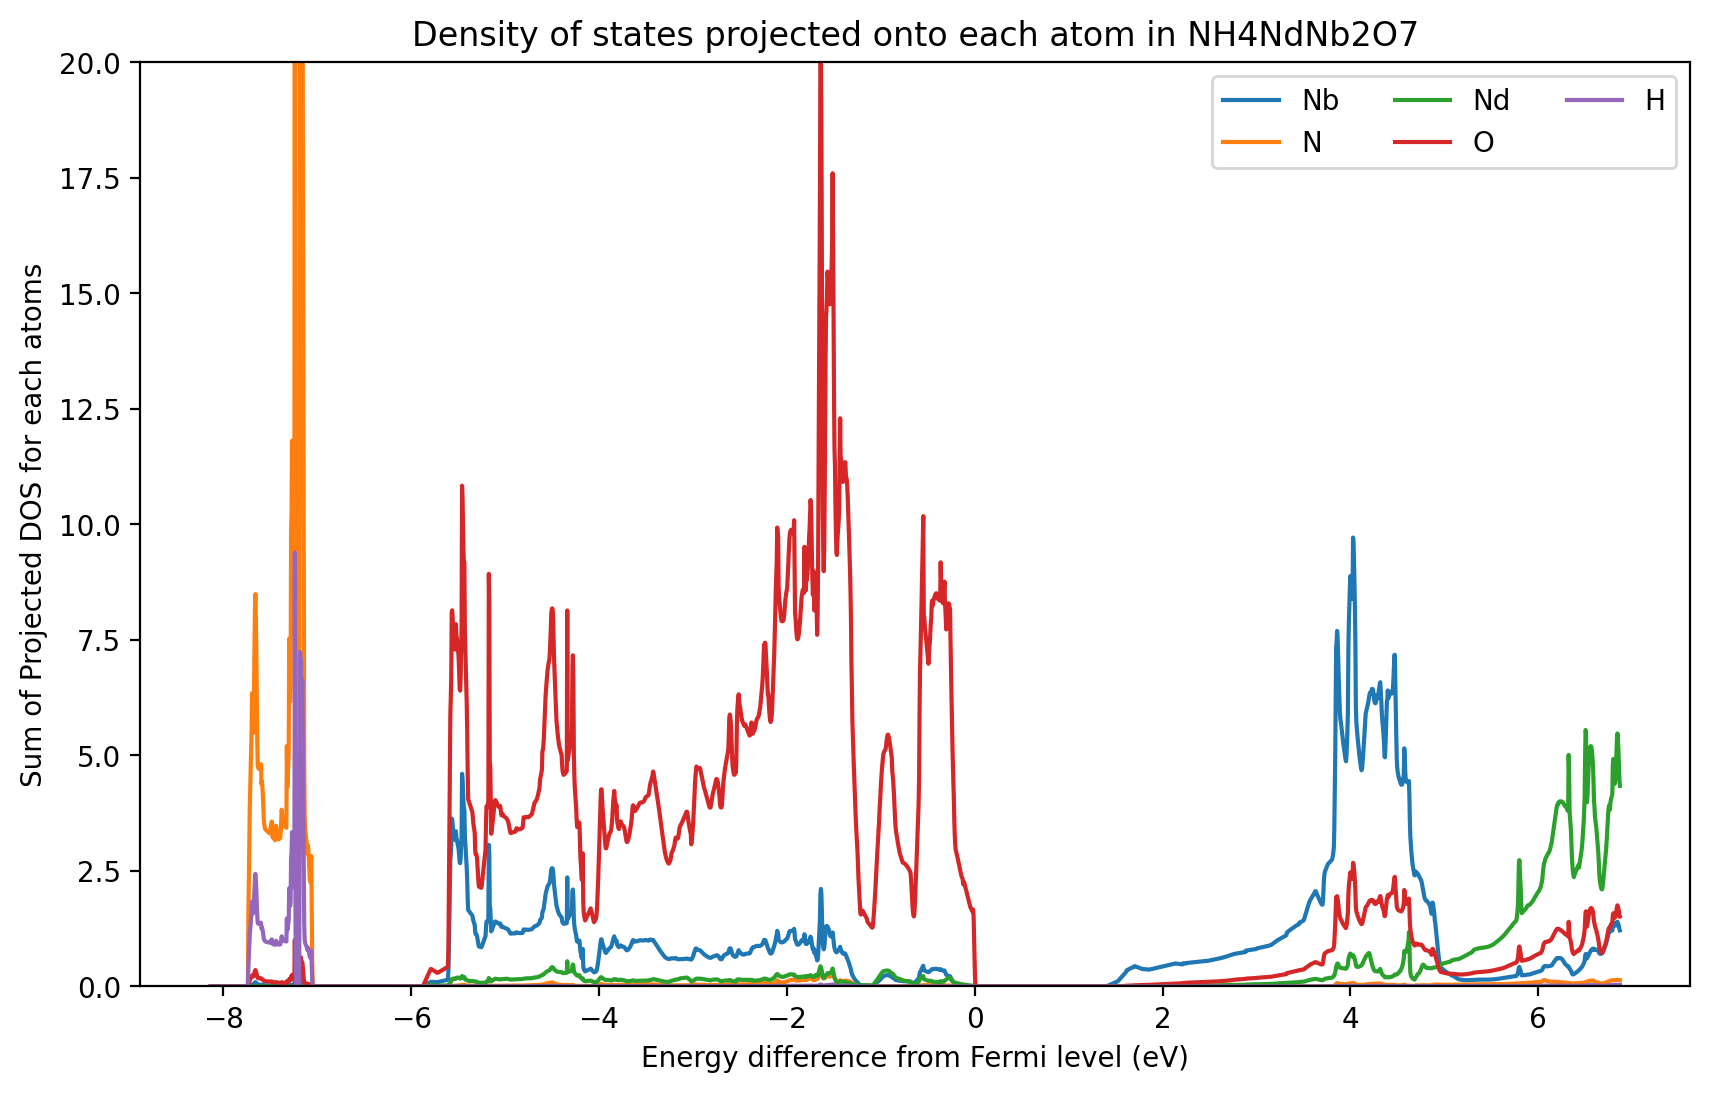

In [5]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Assuming 'df_columns' is your DataFrame containing the data

plt.figure(figsize=(10, 6), dpi=200)  # Adjust figure size as needed
start_idx = 3002
label_list = ['Nd', 'Nb', 'Nb', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'N', 'H', 'H', 'H', 'H']
#label_list = ['Na', 'Nd', 'Nb', 'Nb', 'O', 'O', 'O', 'O', 'O', 'O', 'O']
color_palette = [
    '#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf',
    '#393b79', '#637939', '#8c6d31', '#e7cb94',  '#b5cf6b'
]

# Dictionary to hold data for each label
data_dict = {label: np.zeros(3001) for label in set(label_list)}

for i in range(len(label_list)):
    # Calculate the range for each section
    end_idx = start_idx + 3001
    
    # Extract first column and sum of subsequent columns for each section
    first_column = df_columns.iloc[start_idx:end_idx, 0] - 3.13185039
    sum_subsequent_columns = df_columns.iloc[start_idx:end_idx, 1:].sum(axis=1)
    
    # Accumulate the data in the dictionary under the correct label
    if label_list[i] in data_dict:
        data_dict[label_list[i]] += sum_subsequent_columns.values  # Ensure correct addition
    
    start_idx = end_idx + 1

# Plot each accumulated data set
for idx, (label, data) in enumerate(data_dict.items()):
    plt.plot(first_column, data, label=label, color=color_palette[idx % len(color_palette)])

plt.ylim(0, 20)
#plt.xlim(-1, 2)
plt.xlabel("Energy difference from Fermi level (eV)")
plt.ylabel("Sum of Projected DOS for each atoms")
plt.title("Density of states projected onto each atom in NH4NdNb2O7")
plt.legend(loc='upper right', bbox_to_anchor=(1, 1), ncol=3)
plt.show()
